In [21]:
import netCDF4 as nc
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Importing SINMOD data
filename_PhysStates = 'PhysStates.nc'

PhysStates_data = Dataset(filename_PhysStates, 'r')

# Looking at our list of available variables
variables_list = list(PhysStates_data.variables.keys())
for variable in variables_list:
    units = PhysStates_data.variables[variable].units if 'units' in PhysStates_data.variables[variable].ncattrs() else 'No units'
    print(f"{variable:<20} {units}")

time                 No units
grid_mapping         No units
LayerDepths          m
xc                   meter
yc                   meter
zc                   m
depth                m
DXxDYy               m2
u_velocity           m/s
v_velocity           m/s
elevation            m
temperature          degC
salinity             psu
ice_thickness        m
ice_compactness      -
salinity_ice         psu


In [3]:
# Extracting all the map dimensions
xc = PhysStates_data.variables['xc'][:]  # x-coordinates (meters)
yc = PhysStates_data.variables['yc'][:]  # y-coordinates (meters)
zc = PhysStates_data['LayerDepths'][:]  # z-coordinates (meters)

print("SINMOD grid dimensions:")
print(f"xc shape: {xc.shape}")
print(f"yc shape: {yc.shape}")
print(f"zc shape: {zc.shape}")

SINMOD grid dimensions:
xc shape: (300,)
yc shape: (235,)
zc shape: (25,)


In [18]:
coral_data = pd.read_csv("/Users/maikentomren/Documents/prosjektoppgave/plotting git/Illuminating-the-deep---projections-/combined_coral_data.csv")

# Get info on coral data minimumsdybde and maksimumsdybde
missing_values_min = coral_data['minimumsdybde'].isnull().sum()
missing_values_max = coral_data['maksimumsdybde'].isnull().sum()

average_min = coral_data['minimumsdybde'][coral_data['minimumsdybde'] != 0].mean()
average_max = coral_data['maksimumsdybde'][coral_data['maksimumsdybde'] != 0].mean()

print(f"Missing values in minimumsdybde: {missing_values_min}")
print(f"Missing values in maksimumsdybde: {missing_values_max}")
print(f"Average minimumsdybde: {average_min}")
print(f"Average maksimumsdybde: {average_max}")



Missing values in minimumsdybde: 0
Missing values in maksimumsdybde: 0
Average minimumsdybde: 271.25783972125436
Average maksimumsdybde: 276.3414634146341


In [19]:
coral_data.head()


,Unnamed: 0,gml_id,nøyaktighet,minimumsdybde,maksimumsdybde,lengdegrad,breddegrad
0,0,idcc1ddf21-7f6f-42ae-9de0-c1beae782900,10,300,311,9.87394,64.77133
1,1,ide9bd1ddb-8384-48c4-a649-ba9597853be3,50,0,0,10.50748,63.60458
2,2,id8cddeeb9-2353-4795-9161-4e01397a3a21,10,0,0,7.95556,63.77772
3,3,idaa31e030-a287-4319-8dfc-183c2a169279,10,0,0,9.38355,64.29424
4,4,id98f7a0c4-4c26-4288-a04d-0434cf8221c6,10,0,0,8.50034,64.12643


In [6]:
#TEMPERATURE DATA

# Now checking temperature data matches what we expect from the dimensions
# Extracting temperature at t = 0, and check the dimensions
temperature_var = PhysStates_data.variables['temperature']
temperature = temperature_var[0,:,:,:]
print(f"\nTemperature data shape: {temperature.shape}")


# Now checking mean, max and min temperature to see if it makes sense
print(f"Mean temperature:\t{temperature.mean():.2f}")
print(f"Max temperature:\t{temperature.max():.2f}")
print(f"Min temperature:\t{temperature.min():.2f}")





Temperature data shape: (25, 235, 300)
Mean temperature:	1.64
Max temperature:	10.86
Min temperature:	-1.80


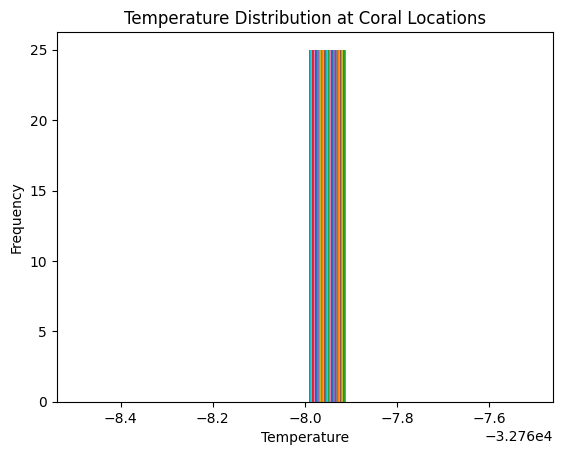

In [22]:
#TEMPERATURE DATA

# Extracting SINMOD temperature at each lon/lat point in coral_data
coral_temperatures = []
for index, row in coral_data.iterrows():
    lon = row['lengdegrad']
    lat = row['breddegrad']
    # Find the corresponding indices in xc and yc arrays
    lon_index = np.abs(xc - lon).argmin()
    lat_index = np.abs(yc - lat).argmin()
    # Extract temperature at that point
    temperature = temperature_var[0, :, lat_index, lon_index]
    coral_temperatures.append(temperature)

# Make a histogram of the temperatures
plt.hist(coral_temperatures, bins=10)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution at Coral Locations')
plt.show()